In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
import skimage as ski
import time
import imageio


2025-03-12 17:09:07.790725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741795747.985470  129947 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741795748.040855  129947 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 17:09:08.435472: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import sys
import os

sys.path.append(os.path.abspath("../src/"))
sys.path.append(os.path.abspath("../src/keras-tf"))

import configuration_handler as cfh
import image_optimisation as io
import transformation as tr
import tf_inverse_compositional_algorithm as tf_ica

We create a configuration file with the meta parameters for the algorithm. 

In [3]:
# reading the parameters from the configuration file
params = cfh.read_config_file("config.ini")
params_rica = params["robust_inverse_compositional_algorithm"]
params_pica = params["pyramidal_inverse_compositional_algorithm"]

## 1. Performing some unit tests

For the sake of debugging the implementation with keras and tensorflow, we perform some tests on the well known cases.

### 1.1. Preparing the dataset of unit tests

In [4]:
# A dataset with simple transformations for unit testing
dataset_tu = {
    "rubber_whale_tr": {
        "original_filename": "rubber_whale.png",
        "transformed_filename": "rubber_whale_tr.png",
        "transformation_type": tr.TransformType.TRANSLATION,
        "gt": [10, 5] # [tx,ty]
    },
    "rubber_whale_rt": {
        "original_filename": "rubber_whale.png",
        "transformed_filename": "rubber_whale_rt.png",
        "transformation_type": tr.TransformType.EUCLIDEAN,
        "gt": [0., 0., -0.1] # [tx,ty,theta] -> ROTATION, theta in radians and counterclockwise
    },
    "rubber_whale_eu": {
        "original_filename": "rubber_whale.png",
        "transformed_filename": "rubber_whale_eu.png",
        "transformation_type": tr.TransformType.EUCLIDEAN,
        "gt": [10., 5., -0.1] # [tx,ty,theta] -> ROTATION, theta in radians and counterclockwise
    },
    "rubber_whale_zo": {
        "original_filename": "rubber_whale.png",
        "transformed_filename": "rubber_whale_zo.png",
        "transformation_type": tr.TransformType.SIMILARITY,
        "gt": [0., 0., -0.1, 0.] # [tx,ty,a,b] -> ZOOM
    }
}

In [5]:
print("The current directory is: ", os.getcwd())
image_path = os.path.join(os.getcwd(), "data")

The current directory is:  /mnt/c/Users/mikef/git/inverse_compositional_algorithm/test


### 1.2. Testing InverseCompositional with Quadratic error function

Tested with the multi-level pyramidal framework, the robust error function type is forced to QUADRATIC to instanciate the InverseCompositional algorithm.

------ Inverse Compositional Algorithm on dataset_tu ------
Processing dataset image:  rubber_whale_tr


/tmp/ipykernel_129947/3409026082.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(os.path.join(image_path, sample["original_filename"]))
/tmp/ipykernel_129947/3409026082.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  transformed_image = imageio.imread(os.path.join(image_path, sample["transformed_filename"]))


	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_tr.png
With Quadratic error function
For transformation type:  TransformType.TRANSLATION


I0000 00:00:1741795773.701271  129947 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6722 MB memory:  -> device: 0, name: Quadro P4000, pci bus id: 0000:01:00.0, compute capability: 6.1


input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795779.585612  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
I0000 00:00:1741795781.400185  130092 cuda_solvers.cc:178] Creating GpuSolver handles for stream 0xf5bcc70
W0000 00:00:1741795785.282285  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795788.911651  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
/tmp/ipykernel_129947/3409026082.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (a

Original parameters:  [np.float64(-10.0), np.float64(-5.0)]
Estimated parameters:  tf.Tensor(
[[-10.00012   -5.000168   0.         0.         0.         0.
    0.         0.      ]], shape=(1, 8), dtype=float32)
Error on estimation:  tf.Tensor(0.00045147783, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_rt
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_rt.png
With Quadratic error function
For transformation type:  TransformType.EUCLIDEAN
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795792.463267  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795796.837093  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27


W0000 00:00:1741795800.150875  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(0.0), np.float64(0.0), np.float64(0.1)]
Estimated parameters:  tf.Tensor([[-0.00042986  0.00014986 -0.10000269]], shape=(1, 3), dtype=float32)
Error on estimation:  tf.Tensor(0.0007850395, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_eu
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_eu.png
With Quadratic error function
For transformation type:  TransformType.EUCLIDEAN
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795803.660385  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795807.368607  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795811.105796  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(-9.450874569546116), np.float64(-5.97335499285841), np.float64(0.1)]
Estimated parameters:  tf.Tensor([[-10.449471    -3.9767425   -0.10000169]], shape=(1, 3), dtype=float32)
Error on estimation:  tf.Tensor(0.000829707, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_zo
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_zo.png
With Quadratic error function
For transformation type:  TransformType.SIMILARITY
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795814.677445  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795818.542335  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795822.205092  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(0.0), np.float64(0.0), np.float64(0.11111111111111116), np.float64(0.0)]
Estimated parameters:  tf.Tensor([[-1.92525191e-03 -7.97314278e-04  1.11117005e-01 -5.10784901e-07]], shape=(1, 4), dtype=float32)
Error on estimation:  tf.Tensor(0.00077944715, shape=(), dtype=float32)


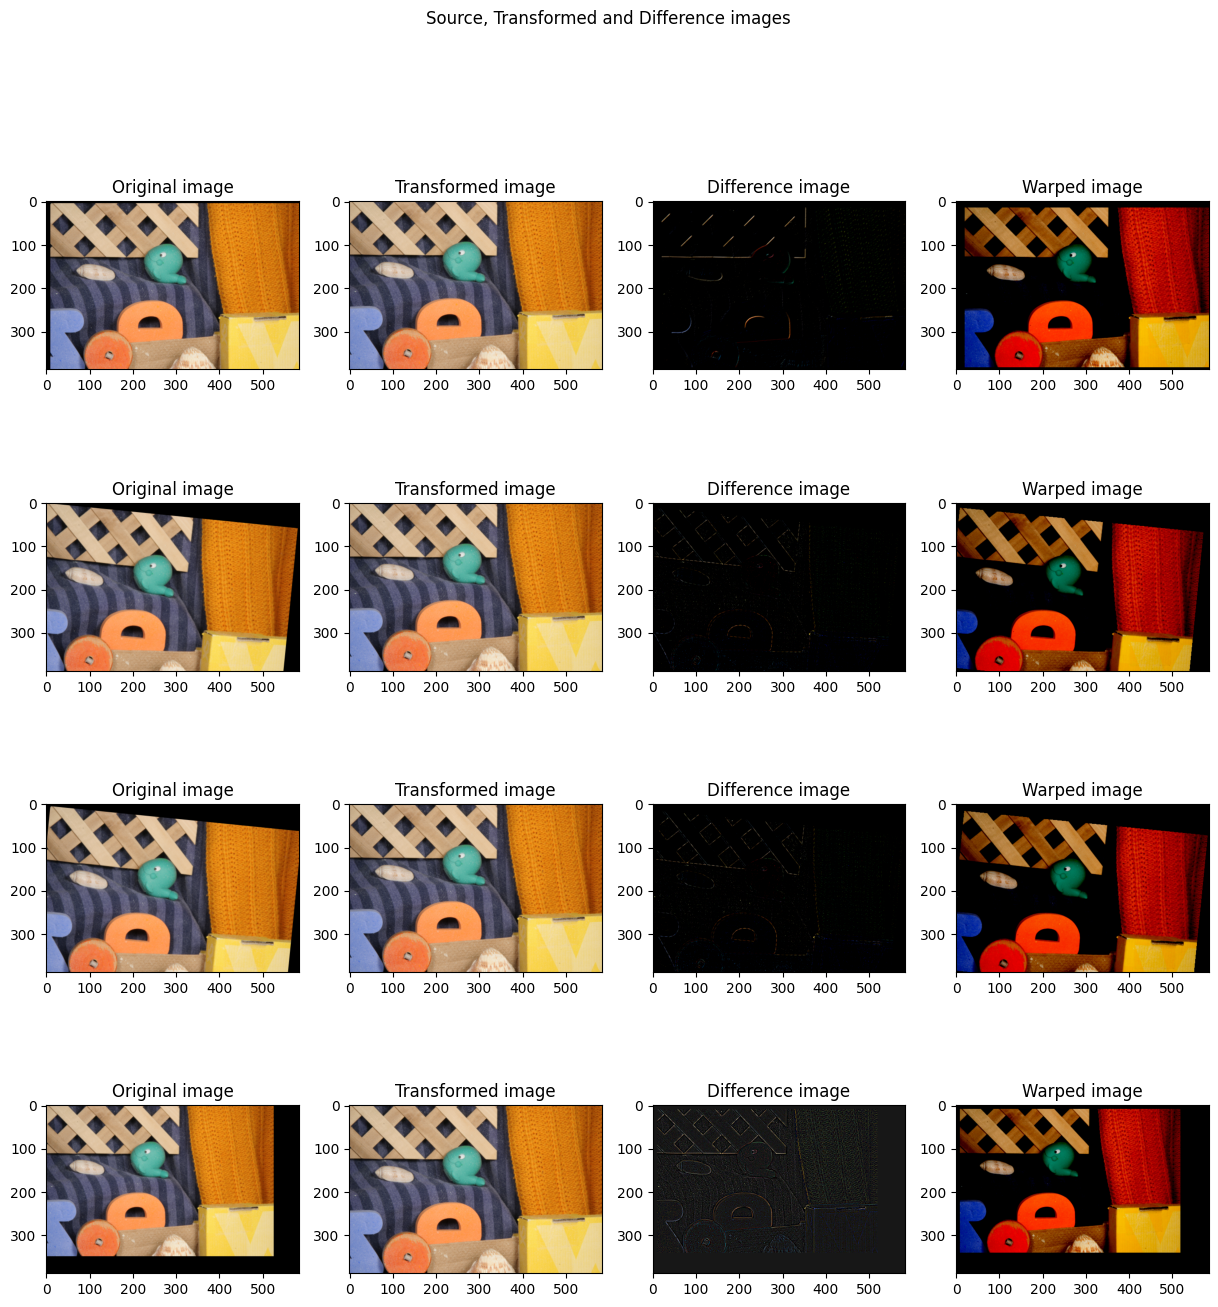

In [6]:
print("------ Inverse Compositional Algorithm on dataset_tu ------")
fig, axs = plt.subplots(4, 4, figsize=(15,15))
fig.suptitle("Source, Transformed and Difference images")
i = 0

for sample_key, sample in dataset_tu.items():
    print("Processing dataset image: ", sample_key)
    original_image = imageio.imread(os.path.join(image_path, sample["original_filename"]))
    transformed_image = imageio.imread(os.path.join(image_path, sample["transformed_filename"]))
    print("\tOriginal Filename: ", sample["original_filename"])
    print("\tTransformed Filename: ", sample["transformed_filename"])
    transformation_type = sample["transformation_type"]
    gt = sample["gt"]
    ofilename = sample_key + ".png"
    # We put everything upside down, as we want the transformed one as I1 and the original one as I2, 
    # in that case we take the inverse of the transformation
    sample["original_image"] = transformed_image
    sample["transformed_image"] = original_image
    gti=tr.matrix2params(np.linalg.inv(tr.params2matrix(gt, transformation_type)), transformation_type)
    sample["gt"] = gti
    original_image = sample["original_image"]
    transformed_image = sample["transformed_image"]
    transformation_type = sample["transformation_type"]
    p = np.zeros(transformation_type.nparams())
    gt = sample["gt"]
    print("With Quadratic error function")
    print("For transformation type: ", transformation_type)
    pica = tf_ica.PyramidalInverseCompositional(
            transformation_type, 
            nscales=params_pica["pyramid_levels"], 
            nu=params_pica["nu"],
            TOL=params_pica["TOL"],
            robust_type=io.RobustErrorFunctionType.QUADRATIC,
            lambda_=0.,
            nanifoutside=True,
            delta=10,
            verbose=False
        )
    # pica = tf_ica.InverseCompositional(
    #         transformation_type, 
    #         TOL=params_pica["TOL"],
    #         nanifoutside=True,
    #         delta=10,
    #         verbose=False
    #     )

    original_batch = tf.expand_dims(original_image, axis=0)  # (1, H, W, C)
    transformed_batch = tf.expand_dims(transformed_image, axis=0)  # (1, H, W, C)
    p, error, DI, Iw = pica(inputs=[original_batch, transformed_batch])
    # p = tf.zeros([1, 8], dtype=tf.float32)
    # p, error, DI, Iw = pica(inputs=[original_batch, transformed_batch, p])
    
    # display the image
    axs[i][0].imshow(ski.exposure.rescale_intensity(original_image))
    axs[i][0].set_title("Original image")
    # axs[i][1].imshow(source_image)
    # axs[i][1].set_title("Source image")
    axs[i][1].imshow(ski.exposure.rescale_intensity(transformed_image))
    axs[i][1].set_title("Transformed image")
    # img = axs[i][2].imshow(DI, cmap="gray", vmin=0, vmax=np.max(np.max(DI)))
    # fig.colorbar(img, ax=axs[i][2])
    axs[i][2].imshow(ski.exposure.rescale_intensity(np.nan_to_num(DI[0], copy=True)))
    axs[i][2].set_title("Difference image")
    axs[i][3].imshow(ski.exposure.rescale_intensity(np.nan_to_num(Iw[0], copy=True)))
    axs[i][3].set_title("Warped image")
    i += 1
    print("Original parameters: ", gt)
    print("Estimated parameters: ", p[0])
    print("Error on estimation: ", error)

plt.show()


### 1.3. Testing RobustInverseCompositional with Charbonnier error function

Tested with the multi-level pyramidal framework, the robust error function type is forced to CHARBONNIER to instanciate the RobustInverseCompositional algorithm.

------ Robust Inverse Compositional Algorithm on dataset_tu ------
Processing dataset image:  rubber_whale_tr
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_tr.png
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 3, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.CHARBONNIER: 4>, 'lambda': 0.0, 'verbose': True}
For transformation type:  TransformType.TRANSLATION
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


/tmp/ipykernel_129947/1525469271.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(os.path.join(image_path, sample["original_filename"]))
/tmp/ipykernel_129947/1525469271.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  transformed_image = imageio.imread(os.path.join(image_path, sample["transformed_filename"]))
W0000 00:00:1741795840.589459  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795844.448436  129947 loop_optimizer.cc:933] Skipping loop optimization for 

Original parameters:  [np.float64(10.0), np.float64(5.0)]
Estimated parameters:  tf.Tensor(
[[-10.0000515  -5.000031    0.          0.          0.          0.
    0.          0.       ]], shape=(1, 8), dtype=float32)
Error on estimation:  tf.Tensor(0.00014623698, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_rt
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_rt.png
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 3, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.CHARBONNIER: 4>, 'lambda': 0.0, 'verbose': True}
For transformation type:  TransformType.EUCLIDEAN
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795852.169554  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795856.333476  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27


W0000 00:00:1741795860.051306  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(0.0), np.float64(0.0), np.float64(-0.1)]
Estimated parameters:  tf.Tensor([[-0.0003827   0.00011964 -0.1000025 ]], shape=(1, 3), dtype=float32)
Error on estimation:  tf.Tensor(0.00073163223, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_eu
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_eu.png
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 3, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.CHARBONNIER: 4>, 'lambda': 0.0, 'verbose': True}
For transformation type:  TransformType.EUCLIDEAN
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795863.749314  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795868.246773  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795871.886521  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(9.999999999999998), np.float64(5.0), np.float64(-0.1)]
Estimated parameters:  tf.Tensor([[-10.449443    -3.9767628   -0.10000161]], shape=(1, 3), dtype=float32)
Error on estimation:  tf.Tensor(0.00089598994, shape=(), dtype=float32)
Processing dataset image:  rubber_whale_zo
	Original Filename:  rubber_whale.png
	Transformed Filename:  rubber_whale_zo.png
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 3, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.CHARBONNIER: 4>, 'lambda': 0.0, 'verbose': True}
For transformation type:  TransformType.SIMILARITY
input_shape:  [(1, 388, 584, 3), (1, 388, 584, 3)]
current_shape:  (388, 584, 3)


W0000 00:00:1741795875.773717  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795879.758593  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
W0000 00:00:1741795884.110593  129947 loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: cond/branch_executed/_27
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original parameters:  [np.float64(0.0), np.float64(0.0), np.float64(-0.10000000000000009), np.float64(0.0)]
Estimated parameters:  tf.Tensor([[ 1.15629239e-03  1.01750134e-03  1.11099124e-01 -2.25279541e-06]], shape=(1, 4), dtype=float32)
Error on estimation:  tf.Tensor(0.00070153154, shape=(), dtype=float32)


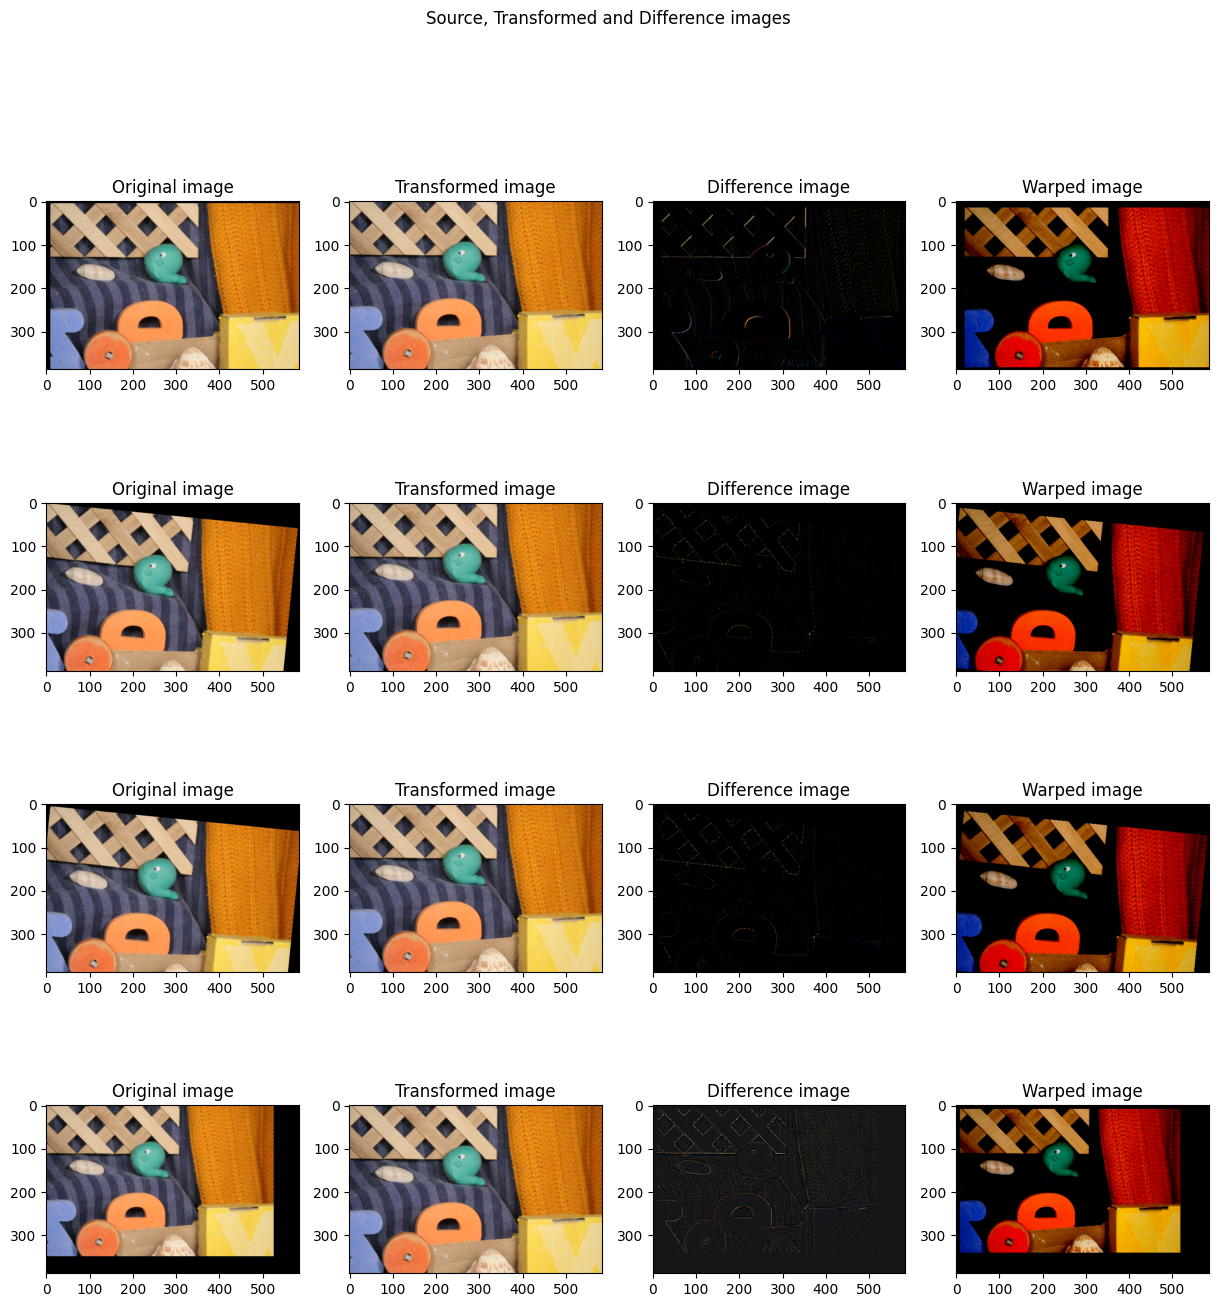

In [7]:
print("------ Robust Inverse Compositional Algorithm on dataset_tu ------")
fig, axs = plt.subplots(4, 4, figsize=(15,15))
fig.suptitle("Source, Transformed and Difference images")
i = 0

for sample_key, sample in dataset_tu.items():
    print("Processing dataset image: ", sample_key)
    original_image = imageio.imread(os.path.join(image_path, sample["original_filename"]))
    transformed_image = imageio.imread(os.path.join(image_path, sample["transformed_filename"]))
    print("\tOriginal Filename: ", sample["original_filename"])
    print("\tTransformed Filename: ", sample["transformed_filename"])
    transformation_type = sample["transformation_type"]
    gt = sample["gt"]
    ofilename = sample_key + ".png"
    # We put everything upside down, as we want the transformed one as I1 and the original one as I2, 
    # in that case we take the inverse of the transformation
    sample["original_image"] = transformed_image
    sample["transformed_image"] = original_image
    gti=tr.matrix2params(np.linalg.inv(tr.params2matrix(gt, transformation_type)), transformation_type)
    sample["gt"] = gti
    original_image = sample["original_image"]
    transformed_image = sample["transformed_image"]
    transformation_type = sample["transformation_type"]
    p = np.zeros(transformation_type.nparams())
    gt = sample["gt"]
    print("With Meta parameters: ", params_pica)
    print("For transformation type: ", transformation_type)
    pica = tf_ica.PyramidalInverseCompositional(
            transformation_type, 
            nscales=params_pica["pyramid_levels"], 
            nu=params_pica["nu"],
            TOL=params_pica["TOL"],
            robust_type=params_pica["robust_type"],
            lambda_=params_pica["lambda"],
            nanifoutside=True,
            delta=10,
            verbose=False
        )

    original_batch = tf.expand_dims(original_image, axis=0)  # (1, H, W, C)
    transformed_batch = tf.expand_dims(transformed_image, axis=0)  # (1, H, W, C)
    p, error, DI, Iw = pica(inputs=[original_batch, transformed_batch])
    
    # display the image
    axs[i][0].imshow(ski.exposure.rescale_intensity(original_image))
    axs[i][0].set_title("Original image")
    # axs[i][1].imshow(source_image)
    # axs[i][1].set_title("Source image")
    axs[i][1].imshow(ski.exposure.rescale_intensity(transformed_image))
    axs[i][1].set_title("Transformed image")
    # img = axs[i][2].imshow(DI, cmap="gray", vmin=0, vmax=np.max(np.max(DI)))
    # fig.colorbar(img, ax=axs[i][2])
    axs[i][2].imshow(ski.exposure.rescale_intensity(np.nan_to_num(DI[0], copy=True)))
    axs[i][2].set_title("Difference image")
    axs[i][3].imshow(ski.exposure.rescale_intensity(np.nan_to_num(Iw[0], copy=True)))
    axs[i][3].set_title("Warped image")
    i += 1
    print("Original parameters: ", gt)
    print("Estimated parameters: ", p[0])
    print("Error on estimation: ", error)

plt.show()
